# HVC Snapshot Preperation Stage

## Step 1: establish which HVC we want to look at + setup

In [80]:
# Collate data
import sys
sys.path.append('C://Users/olive/OneDrive - Australian National University/Honours-Olivia/Programs/honours/standard_modules')
sys.path.append('C://Users/olive/OneDrive - Australian National University/Honours-Olivia/Programs/honours/project')

from collation import collator
import numpy as np

collated_data_masked_HVCs = collator.data_whole_sky(False, load_data="../data_processed/proc_rms", h1_img="../data_catalog/hi4pi-hvc-nhi-ait.fits")
collated_data_large_HVCs = collator.data_whole_sky(False, hvc_area_range=(np.pi, 50), load_data="../data_processed/proc_rms", h1_img="../data_catalog/hi4pi-hvc-nhi-ait.fits")
collated_data_all_HVCs = collator.data_whole_sky(False, full_hvc_range=True, load_data="../data_processed/proc_rms", h1_img="../data_catalog/hi4pi-hvc-nhi-ait.fits")

Gathering data ...
Getting H-alpha emission
Collating RMs
Getting HVC location data
Getting HI emission
Interpolating
Collation complete
Gathering data ...
Getting H-alpha emission
Collating RMs
Getting HVC location data
Getting HI emission
Interpolating
Collation complete
Gathering data ...
Getting H-alpha emission
Collating RMs
Getting HVC location data
Getting HI emission
Interpolating
Collation complete


In [81]:
# Display the HVC masked table

collated_data_masked_HVCs[1]

Name,SkyCoord,RAJ2000,DEJ2000,VLSR,e_VLSR,VGSR,Vdev,FWHM,TbFit,NH,e_NH,Area,dx,dy,Flag,HI,WW91,Simbad,recno,Cat
,"deg,deg",,,km / s,km / s,km / s,km / s,km / s,K,1 / cm2,1 / cm2,deg2,deg,deg,,,,,,
str15,SkyCoord,str11,str9,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str8,str26,str22,str6,int32,str4
G001.2-15.4-185,"283.26028447412233,-34.88611707131728",18 53 02.47,-34 53 10,-185.8,1.0,-181.2,-138.3,21.4,1.36,6e+19,2e+18,1.1,1.0,1.3,H1,CHVC 001.2-15.5-186,"GCN_GCN,N",Simbad,8,GHVC
G002.1-43.1-126,"317.81553732294526,-40.06667225172776",21 11 15.73,-40 04 00,-126.2,1.0,-120.0,-88.7,12.4,2.29,7e+19,1e+18,2.0,1.9,3.1,"T,H5",HVC 002.3-43.1-118,N,Simbad,21,GHVC
G003.9-36.8-137,"309.8759115687047,-38.218616973946475",20 39 30.22,-38 13 07,-137.2,1.0,-125.1,-99.7,24.1,0.90,4e+19,2e+18,1.9,4.3,2.4,H3,HVC 004.1-36.3-130,N,Simbad,38,GHVC
G005.2-33.0-128,"305.341411145527,-36.490005971303596",20 21 21.94,-36 29 24,-128.5,1.5,-111.5,-91.0,28.5,0.53,3e+19,3e+18,1.1,3.1,1.8,H2,HVC 005.6-32.9-120,N,Simbad,47,GHVC
G005.9-32.4-110,"304.7617860811444,-35.80695042693013",20 19 02.83,-35 48 25,-110.6,2.7,-91.3,-73.1,31.2,0.31,4e+18,3e+18,2.9,2.6,3.5,H1,HVC 006.4-31.5-088,N,Simbad,60,GHVC
G011.4-67.7-157,"347.9989551483094,-33.05028139969578",23 11 59.75,-33 03 01,-157.6,1.0,-141.0,-125.1,24.7,0.80,4e+19,2e+18,1.2,2.5,0.9,"T,H1",CHVC 011.6-67.7-155,"N,MS_MS",Simbad,110,GHVC
G015.7-14.6-219,"288.728035058528,-21.75250604671004",19 14 54.73,-21 45 09,-219.6,1.7,-162.0,-177.1,18.9,0.30,1e+19,2e+18,1.3,3.2,2.4,H2,HVC 015.9-14.3-222,"GCN_GCN,EN,N",Simbad,144,GHVC
G020.0-18.3-242,"294.0889102874738,-19.36083941143664",19 36 21.34,-19 21 39,-242.1,1.0,-170.5,-199.6,7.8,0.54,1e+19,8e+17,1.1,1.8,1.5,H1,HVC 020.1-18.1-242,"GCN_GCN,EN",Simbad,176,GHVC


In [112]:
# We aim to analyse all of the HVCs of a particular area, so we go by index

# Specific HVC

index = 65 #59 or 60
selected_HVC = collated_data_masked_HVCs[1][index]
selected_HVC

Name,SkyCoord,RAJ2000,DEJ2000,VLSR,e_VLSR,VGSR,Vdev,FWHM,TbFit,NH,e_NH,Area,dx,dy,Flag,HI,WW91,Simbad,recno,Cat
,"deg,deg",,,km / s,km / s,km / s,km / s,km / s,K,1 / cm2,1 / cm2,deg2,deg,deg,,,,,,
str15,SkyCoord,str11,str9,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str8,str26,str22,str6,int32,str4
G263.7-18.6+273,"107.59532795617528,-53.10971618893227",07 10 22.88,-53 06 35,273.4,1.0,66.3,225.9,19.5,0.58,2e+19,2e+18,1.6,2.4,3.0,H1,HVC 263.2-19.4+273,EP,Simbad,740,GHVC


## Step 2: Determine field corners

In [117]:
from astropy.coordinates import SkyCoord
from astropy import units as u

dx = selected_HVC['dx']
dy = selected_HVC['dy']

# Twice the area of the HVC to ensure it's including all of the HVC
di = max(dx, dy) * u.deg

centre_coord = selected_HVC['SkyCoord'].galactic

# Only check for overflows as di will always be positive
#new_dec = centre_coord.l + di
#if new_dec.value > 90:
#    new_dec = 180 * u.deg - new_dec # This covers obtuse/reflex angles up to 360 degrees

# Calculate upper corner coordinate
new_coord = SkyCoord(centre_coord.l+di*2, centre_coord.b+di*2, frame='galactic')#SkyCoord((centre_coord.+di), new_dec, frame='galactic')

# Only check for underflows as di will always be positive
#new_dec = centre_coord.dec - di*2
#if new_dec.value < -90:
#    new_dec = - (180 * u.deg + new_dec) # This covers obtuse/reflex angles up to -360 degrees

# Calculate lower corner coordinate
#new_coord = SkyCoord((centre_coord.ra-di*2), new_dec, frame='icrs')

# IMPORTANT: The upper corner may not have values greater. This cannot be shortcut by swapping coordinates around, and must be accounted for
print(centre_coord, new_coord)

<SkyCoord (Galactic): (l, b) in deg
    (263.76596946, -18.69807734)> <SkyCoord (Galactic): (l, b) in deg
    (269.76596946, -12.69807734)>


In [118]:
#centre_coord

from astropy.wcs import WCS
from wcs import image_transform as it

wcs = WCS(collated_data_masked_HVCs[2].header)
pix = list(np.array(list(map(int, it.get_pixel(wcs, centre_coord))))-1)

pix

[1003, 734]

## Step 3: Crop images

[915, 808] [1003, 734]


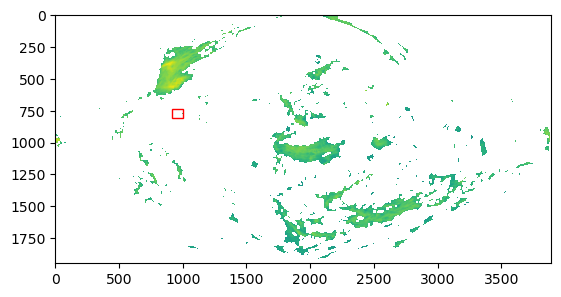

In [119]:
from astropy.wcs import WCS
from wcs import image_transform as it

wcs = WCS(collated_data_masked_HVCs[2].header)
pix_down = list(np.array(list(map(int, it.get_pixel(wcs, centre_coord))))-1)
pix_up = list(np.array(list(map(int, it.get_pixel(wcs, new_coord))))-1)
print(pix_up, pix_down)

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import math

plt.imshow(collated_data_masked_HVCs[2].data)
plt.gca().add_patch(Rectangle(
    (pix_up[0], pix_down[1]),
    np.abs(pix_up[0]-pix_down[0]),
    np.abs(pix_up[1]-pix_down[1]),
    linewidth=1,edgecolor='r',facecolor='none'
    ))
plt.show()

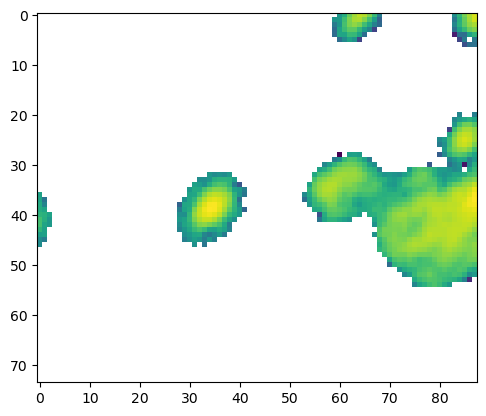

In [120]:
def crop_img_1d(img, pixel_up, pixel_down):
    img = img[pixel_down[1]:pixel_up[1]]
    return img

def crop_img(img, pixel_up, pixel_down):
    img = img[pixel_down[1]:pixel_up[1]] if pixel_down[1]<pixel_up[1] else img[pixel_up[1]:pixel_down[1]]
    img = np.transpose(img)
    img = img[pixel_down[0]:pixel_up[0]] if pixel_down[0]<pixel_up[0] else img[pixel_up[0]:pixel_down[0]]
    img = np.transpose(img)
    return img

plt.imshow(crop_img(collated_data_masked_HVCs[2].data, pix_up, pix_down))
plt.show()

## Step 4: Isolate RMs

## Step 5: Foreground corrections

## Putting it all together